# Tarea corta 01

Machine Learning - Maestría de Ciencias de la computación - Profesor Dr. Jose Carranza Rojas

Estudiantes:
+ Jason Carmona (20NN...)
+ Edisson López (2013103311)

## Usando listas

In [88]:
""" Code of Jason Carmona """


' Code of Jason Carmona '

## Usando Pytorch

In [89]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import time

# import numpy as np

In [90]:

dtype = torch.float
device = torch.device("cpu")
# Uncomment next to run on GPU. Will be until 30x faster.
# device = torch.device("cuda:0") 



In [91]:

class LinearRegression:
    
    def __init__(self, n_features):
        ### PREV -> self.W = np.random.normal(-1,1,(n_features,1)) #weights
        self.W = torch.tensor(torch.normal(-1,1,(n_features,1)), dtype=torch.float64) #weights
        ### PREV -> self.b = np.random.rand(1) #intercept
        self.b = torch.randn(1) #intercept
        
    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W -= learning_rate*delta_W
        self.b -= learning_rate*delta_b
        
    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        ### PREV -> delta_W = np.sum(np.multiply(((np.matmul(X,self.W)+self.b)-Y), X))*2/X.shape[0]
        pre_delta_W_1 = torch.matmul(X, self.W)
        pre_delta_W_2 = ((pre_delta_W_1 + self.b) -Y)
        pre_delta_W_3 = torch.multiply(pre_delta_W_2, X)
        delta_W = torch.sum(pre_delta_W_3) *2/X.shape[0]
        
        #partial derivative of cost w.r.t the intercept
        ### PREV -> delta_b = np.sum( ((np.matmul(X,self.W)+self.b)-Y) )*2/X.shape[0]
        delta_b = torch.sum( ((torch.matmul(X, self.W) + self.b) - Y) ) *2/X.shape[0]

        return delta_W, delta_b
    
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        ### PREV -> X = np.array(X).reshape(-1,1)
        X = torch.tensor(X).reshape(-1,1)
        ### PREV -> Y = np.array(Y).reshape(-1,1)
        Y = torch.tensor(Y).reshape(-1,1)

        self.parameter_cache = []       
        for i in range(epochs):
            
            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)
            
            ### PREV -> self.parameter_cache.append(np.array((self.W,self.b)))
            self.parameter_cache.append(torch.tensor((self.W,self.b)))
            
        return self.W, self.b, self.parameter_cache

    def predict(self, X):
#         print(X.shape, X.reshape(-1,1).shape)
        ### PREV -> product = np.matmul(torch.tensor(X).reshape(-1,1),self.W)+self.b
        product = torch.matmul(torch.tensor(X).reshape(-1,1),self.W)+self.b
        
        return product

    

In [92]:
df = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [93]:
x = (df['Weight']-df['Weight'].mean())/df['Weight'].std() #standardization of the dataset
y = (df["Height"]-df['Height'].mean())/df["Height"].std()
x.shape, y.shape

((10000,), (10000,))

<ipython-input-91-80ee166cbaa9>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.W = torch.tensor(torch.normal(-1,1,(n_features,1)), dtype=torch.float64) #weights
<ipython-input-91-80ee166cbaa9>:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  product = torch.matmul(torch.tensor(X).reshape(-1,1),self.W)+self.b
tensor([-0.3585], dtype=torch.float64) tensor(-3.1656)


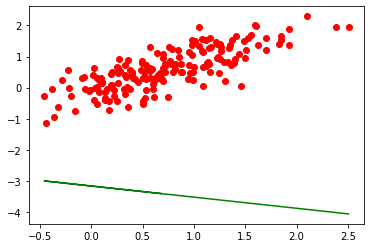

In [94]:
# Finally,
# train and show the predict
#
reg = LinearRegression(n_features=1)
params = reg.train(x, y, epochs=90, learning_rate=0.000001)
print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg.predict(torch.tensor(x[:180]))
plt.plot(x[:180], pred[:180], color='green')




--- última línea ---